In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
loan_data = pd.read_csv("train.csv")
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
#remove some columns as our group find it does not bring values
loan_data.drop(['loan_amnt', 'title','funded_amnt_inv', 'batch_enrolled', 'sub_grade', 'pymnt_plan', 'desc', 'verification_status_joint', 'last_week_pay', 'emp_title', 'emp_length', 'zip_code', 'addr_state', 'application_type', 'total_rev_hi_lim'], axis=1, inplace=True)

In [4]:
#Removing string 'months' from term and 'th week' from last_week_pay
loan_data['term'].replace(to_replace='months', value='', regex=True, inplace=True)

# loan_default['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
loan_data['verification_status'].replace(to_replace='Source Verified', value='Verified', regex=True, inplace=True)

In [5]:
cols_to_plot = loan_data[['loan_status', 'funded_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal']]

In [6]:
columns_to_select = ['loan_status', 'funded_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal']

Graph for Loan_status: Total = 2


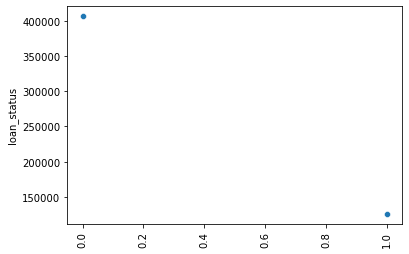

Graph for Funded_amnt: Total = 1370


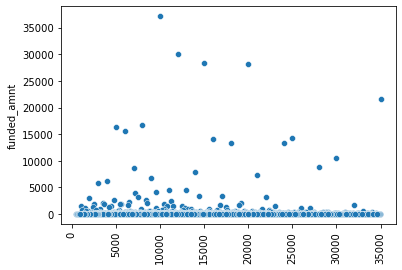

Graph for Term: Total = 2


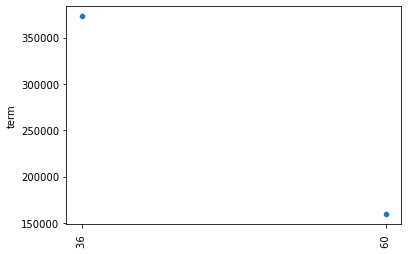

Graph for Int_rate: Total = 535


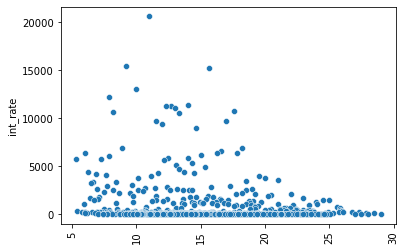

Graph for Grade: Total = 7


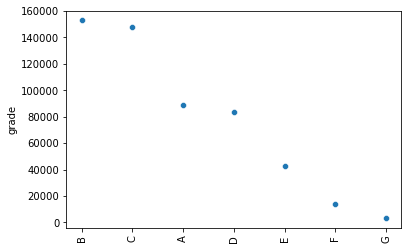

Graph for Home_ownership: Total = 6


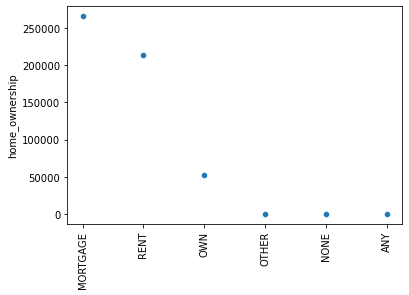

Graph for Annual_inc: Total = 33988


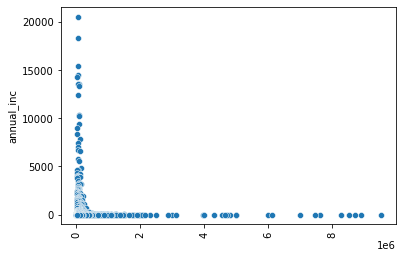

Graph for Verification_status: Total = 2


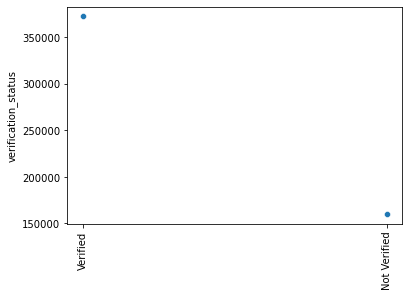

Graph for Purpose: Total = 14


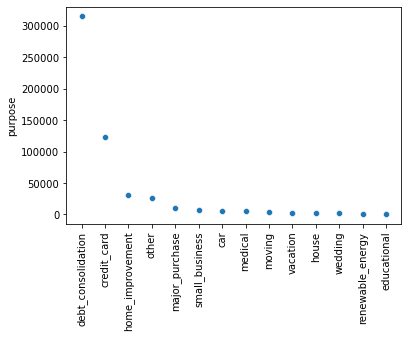

Graph for Dti: Total = 4058


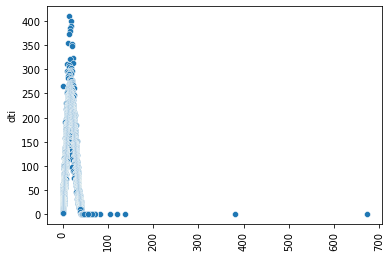

Graph for Delinq_2yrs: Total = 26


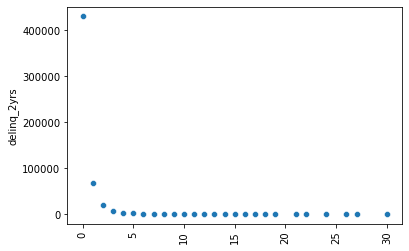

Graph for Inq_last_6mths: Total = 23


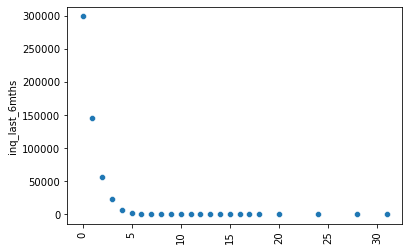

Graph for Mths_since_last_delinq: Total = 147


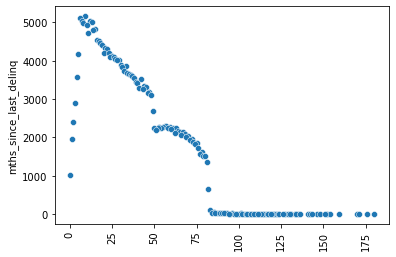

Graph for Mths_since_last_record: Total = 122


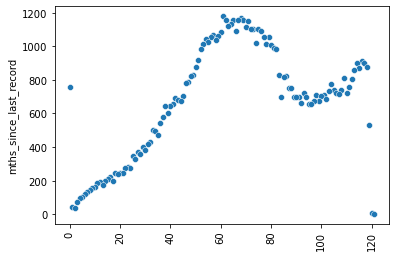

Graph for Open_acc: Total = 73


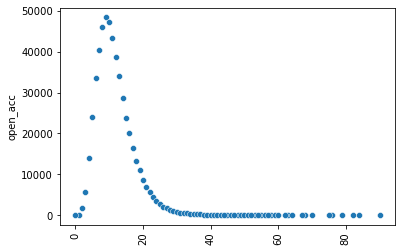

Graph for Pub_rec: Total = 28


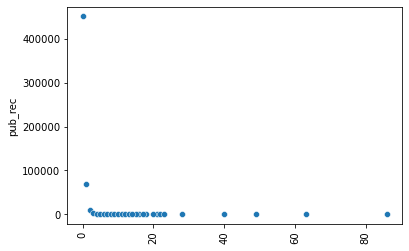

Graph for Revol_bal: Total = 63459


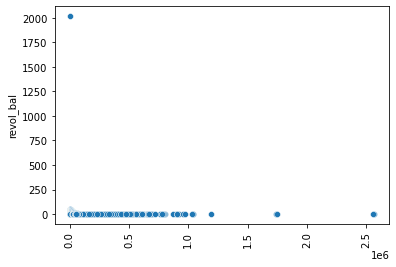

Graph for Revol_util: Total = 1265


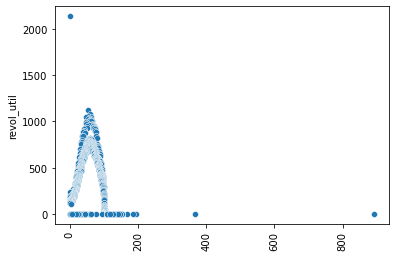

Graph for Total_acc: Total = 126


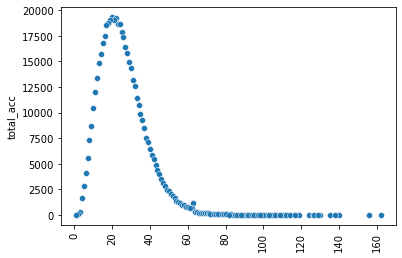

Graph for Initial_list_status: Total = 2


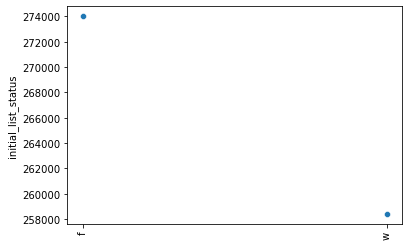

Graph for Total_rec_int: Total = 243149


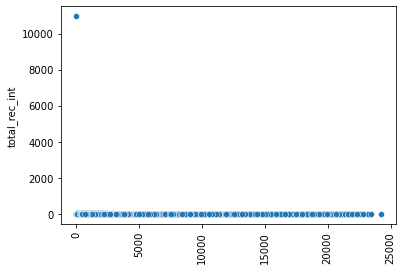

Graph for Total_rec_late_fee: Total = 4073


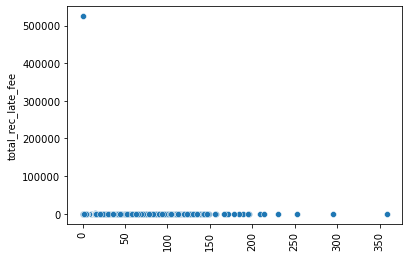

Graph for Recoveries: Total = 14024


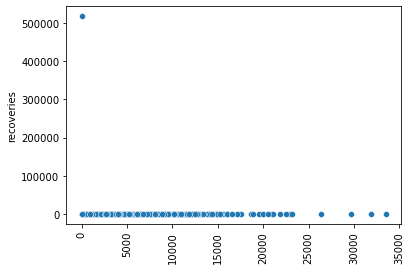

Graph for Collection_recovery_fee: Total = 12617


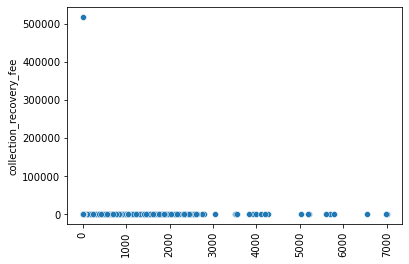

Graph for Collections_12_mths_ex_med: Total = 9


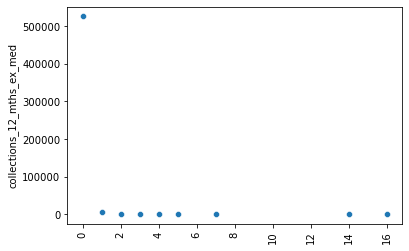

Graph for Mths_since_last_major_derog: Total = 162


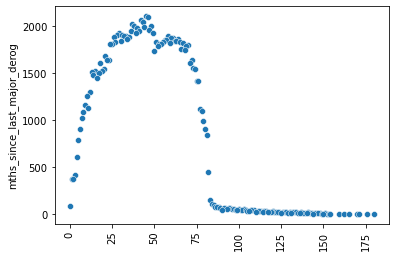

Graph for Acc_now_delinq: Total = 8


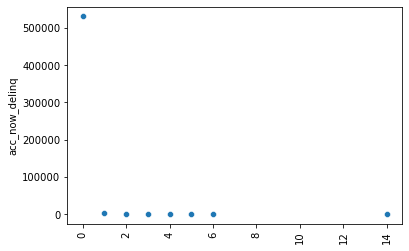

Graph for Tot_coll_amt: Total = 8081


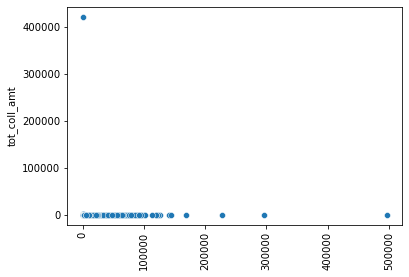

Graph for Tot_cur_bal: Total = 251640


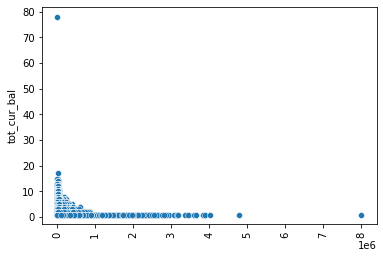

In [7]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

In [8]:
#remove outliers for annual_inc (over 2 mil)

# loan_data = loan_data[loan_data.annual_inc < 2000000]

In [9]:
#Purpose and home_ownership - select the 'important' data only
loan_data = loan_data[(loan_data['home_ownership'].isin(['MORTGAGE','OWN','RENT', 'OTHER', 'NONE']))][columns_to_select].reset_index().drop('index', axis=1)

In [10]:
loan_data['purpose']=loan_data['purpose'].replace(['educatio0l', 'major_purchase', 'car', 'medical', 'vacation', 'wedding', 'educational'], 'personal_loan')

loan_data['purpose']=loan_data['purpose'].replace(['home_improvement', 'house', 'moving'], 'home')

loan_data['purpose']=loan_data['purpose'].replace(['renewable_energy', 'small_business'], 'other')

loan_data.purpose.value_counts()

debt_consolidation    314987
credit_card           123670
home                   36500
other                  32128
personal_loan          25140
Name: purpose, dtype: int64

In [11]:
#Label Encoding
#creating an instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values and storing it in another column
loan_data['grade'] = labelencoder.fit_transform(loan_data['grade'])
loan_data['verification_status'] = labelencoder.fit_transform(loan_data['verification_status'])
loan_data['initial_list_status'] = labelencoder.fit_transform(loan_data['initial_list_status'])
loan_data['home_ownership'] = labelencoder.fit_transform(loan_data['home_ownership'])
loan_data['purpose'] = labelencoder.fit_transform(loan_data['purpose'])

loan_data

,loan_status,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0,14350,36,19.19,4,3,28700.0,1,1,33.88,...,0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
1,0,4800,36,10.99,1,0,65000.0,1,2,3.64,...,1,83.95,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0
2,0,10000,36,7.26,0,3,45000.0,0,1,18.42,...,1,56.47,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0
3,0,15000,36,19.72,3,4,105000.0,0,1,14.97,...,0,4858.62,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0
4,0,16000,36,10.64,1,4,52000.0,1,0,20.16,...,1,2296.41,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532420,0,20000,36,12.49,1,0,75000.0,1,1,14.53,...,0,2595.45,0.0,0.0,0.0,0.0,NaN,0.0,0.0,83087.0
532421,0,12000,60,14.99,2,0,59000.0,0,1,22.97,...,1,2182.92,0.0,0.0,0.0,0.0,NaN,0.0,0.0,227812.0
532422,1,18725,60,20.80,4,4,42504.0,1,1,27.27,...,0,645.32,0.0,0.0,0.0,0.0,NaN,0.0,0.0,26010.0
532423,0,21000,60,16.29,3,4,50000.0,1,0,14.91,...,1,4619.79,0.0,0.0,0.0,0.0,NaN,0.0,0.0,29197.0


<AxesSubplot:>

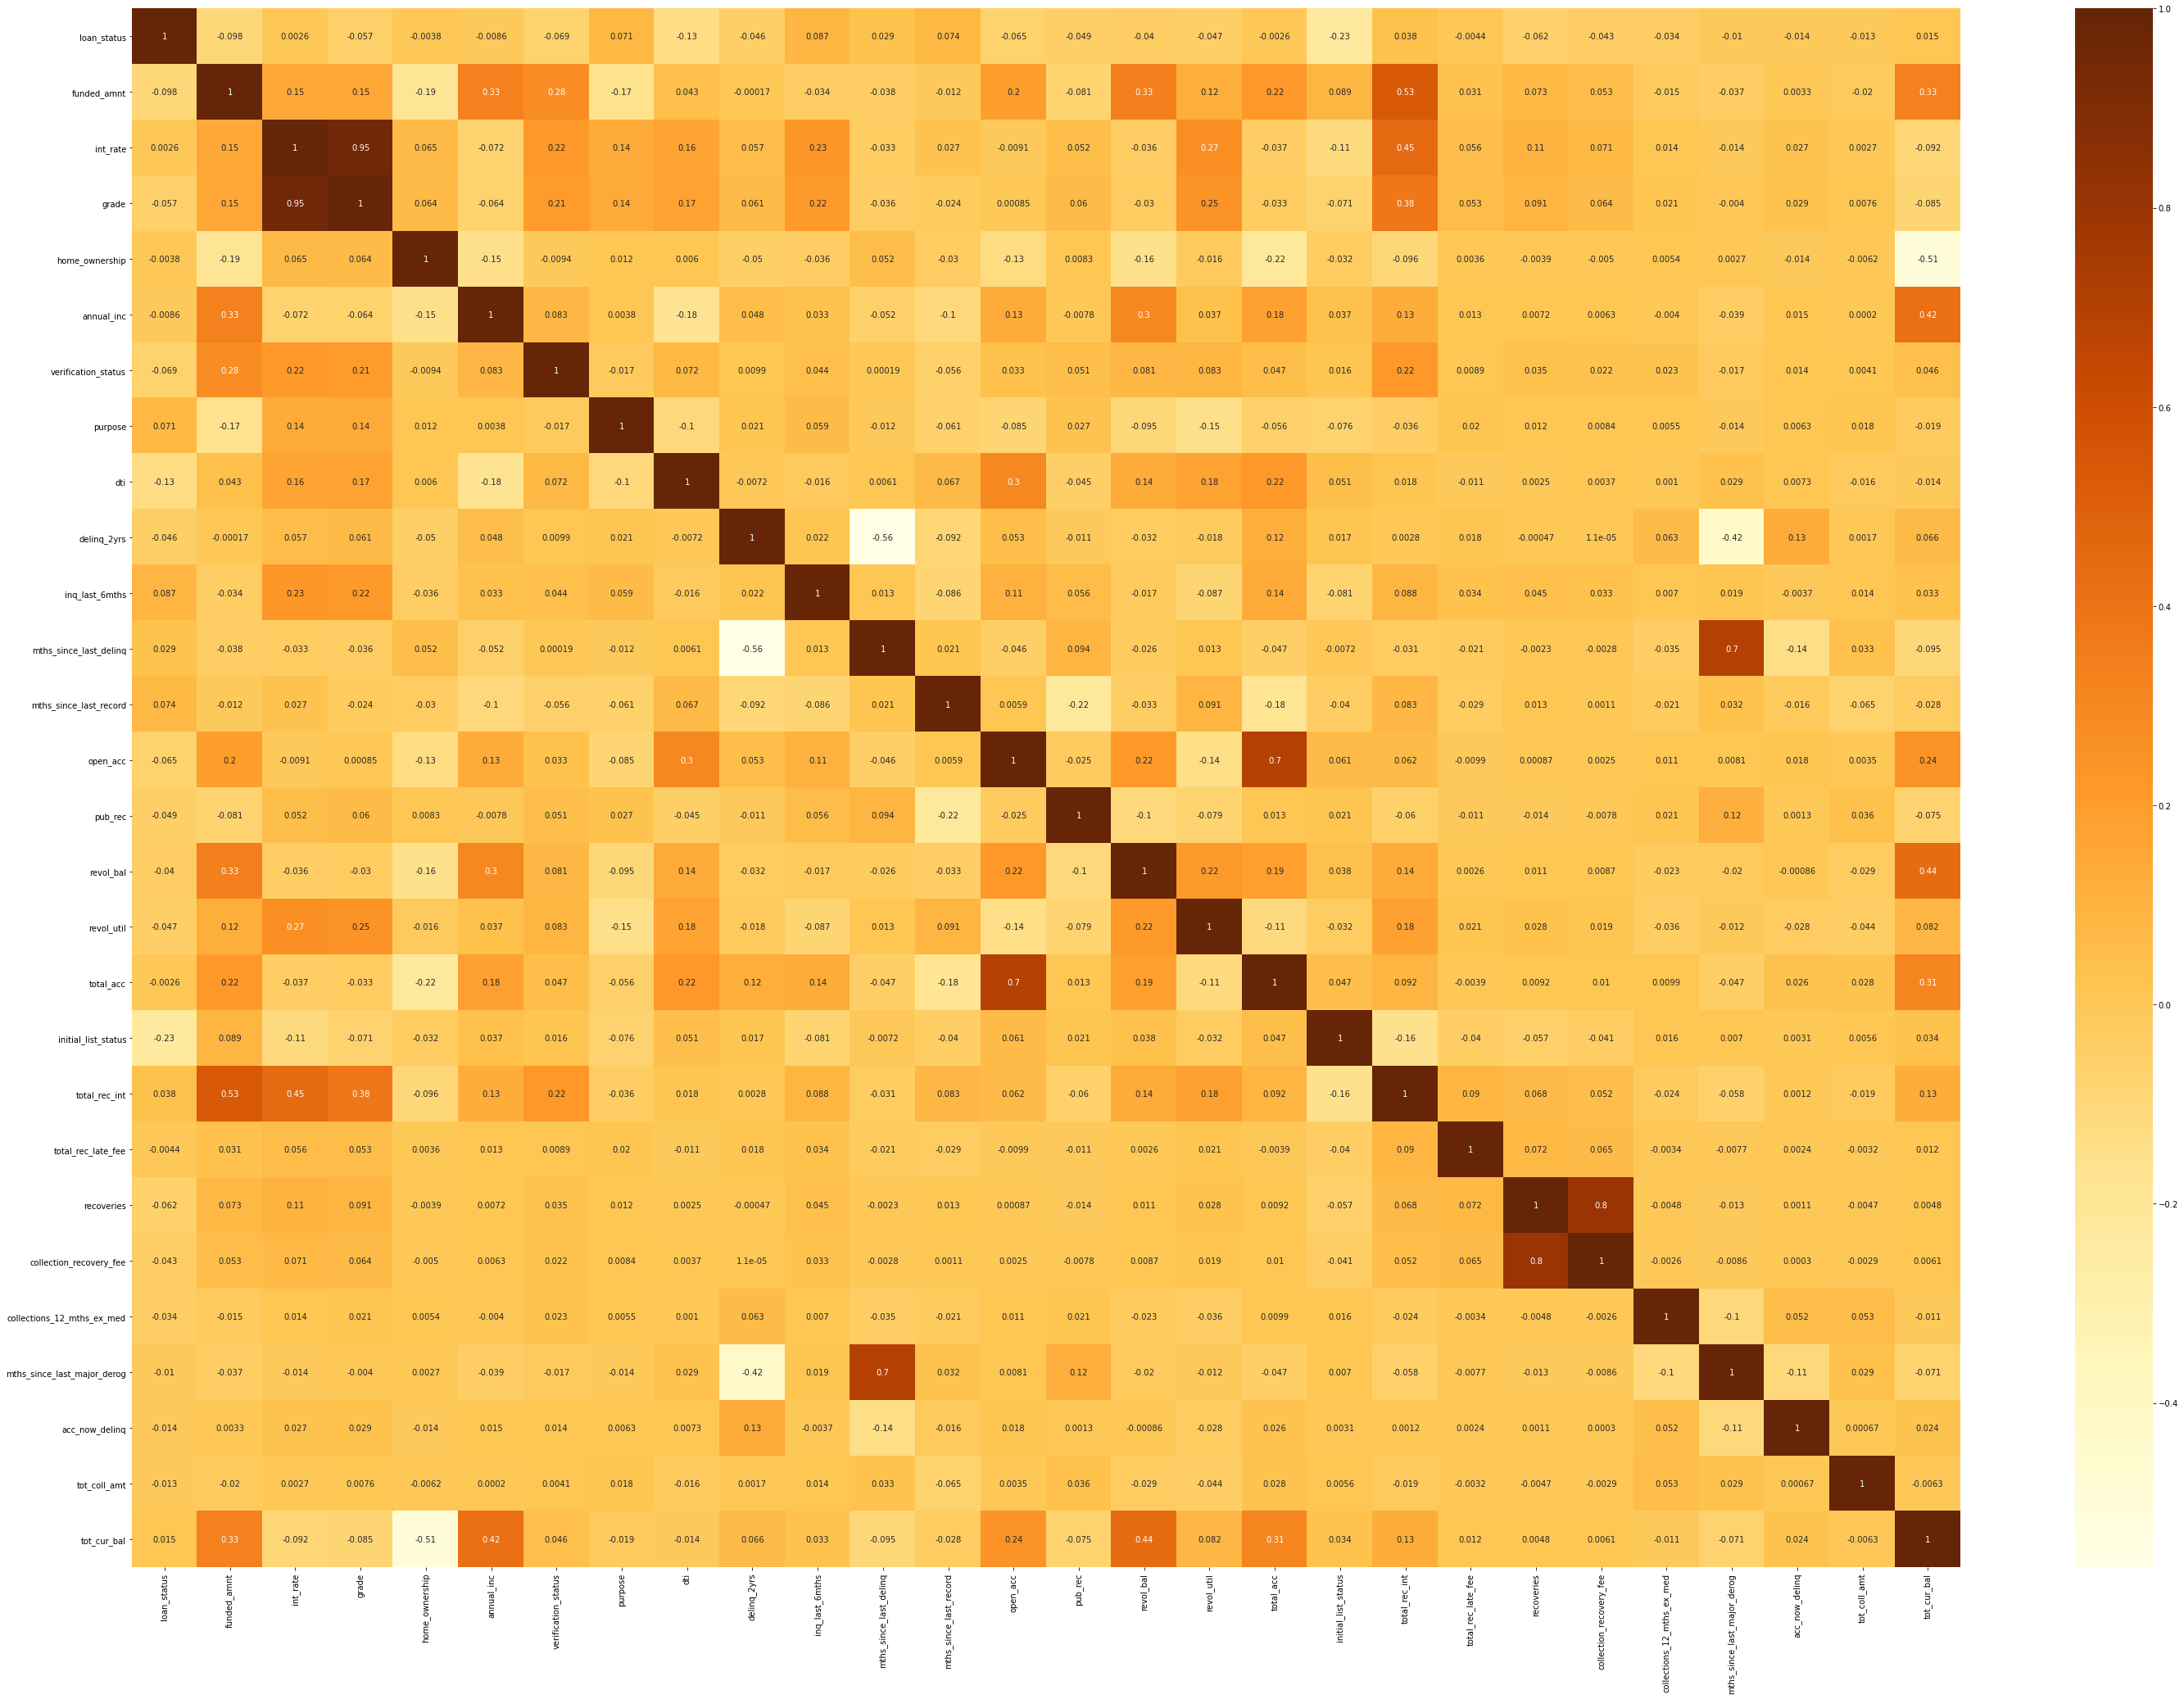

In [12]:
plt.figure(figsize=(50,35))
sns.heatmap(loan_data.corr(), cmap='YlOrBr', annot=True)

In [13]:
loan_data.corr()["loan_status"].sort_values(ascending=False)

loan_status                    1.000000
inq_last_6mths                 0.087341
mths_since_last_record         0.073566
purpose                        0.071315
total_rec_int                  0.038346
mths_since_last_delinq         0.029232
tot_cur_bal                    0.014580
int_rate                       0.002592
total_acc                     -0.002628
home_ownership                -0.003805
total_rec_late_fee            -0.004353
annual_inc                    -0.008594
mths_since_last_major_derog   -0.010213
tot_coll_amt                  -0.013165
acc_now_delinq                -0.014415
collections_12_mths_ex_med    -0.033922
revol_bal                     -0.040049
collection_recovery_fee       -0.042823
delinq_2yrs                   -0.045717
revol_util                    -0.047196
pub_rec                       -0.048883
grade                         -0.056772
recoveries                    -0.062084
open_acc                      -0.065045
verification_status           -0.068868


<h1>1. Fill NaN with 0</h1>

In [14]:
fillZero = loan_data.copy()

In [15]:
fillZero.isnull().sum()

loan_status                         0
funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          3
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450302
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_deli

In [16]:
cols_Zero = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal']
    
for col in cols_Zero:
    print('Imputation with Zero: %s' % (col))
    fillZero[col].fillna(0, inplace=True)

Imputation with Zero: mths_since_last_delinq
Imputation with Zero: mths_since_last_record
Imputation with Zero: mths_since_last_major_derog
Imputation with Zero: tot_coll_amt
Imputation with Zero: tot_cur_bal


In [17]:
fillZero = fillZero.dropna(axis=0)
fillZero

,loan_status,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0,14350,36,19.19,4,3,28700.0,1,1,33.88,...,0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
1,0,4800,36,10.99,1,0,65000.0,1,2,3.64,...,1,83.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9974.0
2,0,10000,36,7.26,0,3,45000.0,0,1,18.42,...,1,56.47,0.0,0.0,0.0,0.0,0.0,0.0,65.0,38295.0
3,0,15000,36,19.72,3,4,105000.0,0,1,14.97,...,0,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55564.0
4,0,16000,36,10.64,1,4,52000.0,1,0,20.16,...,1,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532420,0,20000,36,12.49,1,0,75000.0,1,1,14.53,...,0,2595.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83087.0
532421,0,12000,60,14.99,2,0,59000.0,0,1,22.97,...,1,2182.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227812.0
532422,1,18725,60,20.80,4,4,42504.0,1,1,27.27,...,0,645.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26010.0
532423,0,21000,60,16.29,3,4,50000.0,1,0,14.91,...,1,4619.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29197.0


In [18]:
fillZero.isnull().sum()

loan_status                    0
funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
dtype: int64

In [19]:
fillZero_X = fillZero.iloc[:,1:].values
fillZero_y = fillZero.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillZero_X_train, fillZero_X_test, fillZero_y_train, fillZero_y_test = train_test_split(fillZero_X, fillZero_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [20]:
print('Training Features Shape:', fillZero_X_train.shape)
print('Training Labels Shape:', fillZero_y_train.shape)
print('Testing Features Shape:', fillZero_X_test.shape)
print('Testing Labels Shape:', fillZero_y_test.shape)

Training Features Shape: (425649, 28)
Training Labels Shape: (425649,)
Testing Features Shape: (106413, 28)
Testing Labels Shape: (106413,)


In [21]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 200 decision trees
fillZero_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Train the model on training data
fillZero_rf.fit(fillZero_X_train, fillZero_y_train);

In [22]:
predictions = fillZero_rf.predict(fillZero_X_test)
accuracy = accuracy_score(fillZero_y_test, predictions)
print('Accuracy = {:0.4f}%.'.format(accuracy))

#accuracy is not a great measure of classifier performance wjem classes are imbalanced

Accuracy = 0.8317%.


In [23]:
print(classification_report(fillZero_y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     81154
           1       0.87      0.34      0.49     25259

    accuracy                           0.83    106413
   macro avg       0.85      0.66      0.69    106413
weighted avg       0.84      0.83      0.80    106413



In [24]:
fillZero_feature_list = list(fillZero.iloc[:,1:].columns)

In [25]:
# Get numerical feature importances
fillZero_importances = list(fillZero_rf.feature_importances_)

# List of tuples with variable and importance
fillZero_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillZero_feature_list, fillZero_importances)]

# Sort the feature importances by most important first
fillZero_feature_importances = sorted(fillZero_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillZero_feature_importances];

Variable: tot_cur_bal          Importance: 0.19
Variable: int_rate             Importance: 0.08
Variable: total_rec_int        Importance: 0.08
Variable: dti                  Importance: 0.07
Variable: funded_amnt          Importance: 0.06
Variable: annual_inc           Importance: 0.06
Variable: revol_bal            Importance: 0.06
Variable: revol_util           Importance: 0.06
Variable: total_acc            Importance: 0.05
Variable: open_acc             Importance: 0.04
Variable: mths_since_last_delinq Importance: 0.03
Variable: initial_list_status  Importance: 0.03
Variable: grade                Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: inq_last_6mths       Importance: 0.02
Variable: recoveries           Importance: 0.02
Variable: mths_since_last_major_derog Importance: 0.02
Variable: term                 Importance: 0.01
Variable: home_ownership       Importance: 0.01
Variable: verification_status  Importance: 0.01
Variable: delinq_2yrs          

In [26]:
# New random forest with only the two most important variables
fillZero_rf_most_important = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Extract the 15 most important features
fillZero_important_indices = [fillZero_feature_list.index('tot_cur_bal'), fillZero_feature_list.index('int_rate'), fillZero_feature_list.index('total_rec_int'), fillZero_feature_list.index('dti'), fillZero_feature_list.index('funded_amnt'), fillZero_feature_list.index('annual_inc'), fillZero_feature_list.index('revol_bal'), fillZero_feature_list.index('revol_util'), fillZero_feature_list.index('total_acc'), fillZero_feature_list.index('open_acc'), fillZero_feature_list.index('mths_since_last_delinq'), fillZero_feature_list.index('initial_list_status'), fillZero_feature_list.index('grade'), fillZero_feature_list.index('purpose'), fillZero_feature_list.index('inq_last_6mths')]
fillZero_train_important = fillZero_X_train[:, fillZero_important_indices]
fillZero_test_important = fillZero_X_test[:, fillZero_important_indices]

# Train the random forest
fillZero_rf_most_important.fit(fillZero_train_important, fillZero_y_train)

#check accuracy
fillZero_predictions = fillZero_rf_most_important.predict(fillZero_test_important)
fillZero_accuracy = accuracy_score(fillZero_y_test, fillZero_predictions)
print('Accuracy = {:0.4f}%.'.format(fillZero_accuracy))


Accuracy = 0.8190%.


In [27]:
print(classification_report(fillZero_y_test, fillZero_predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     81154
           1       0.79      0.32      0.46     25259

    accuracy                           0.82    106413
   macro avg       0.81      0.65      0.67    106413
weighted avg       0.81      0.82      0.79    106413



<h1>2. Fill NaN with Median</h1>

In [28]:
fillMedian = loan_data.copy()

In [29]:
fillMedian.isnull().sum()

loan_status                         0
funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          3
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450302
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_deli

In [30]:
cols_Median = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
cols_0 = ['tot_coll_amt', 'tot_cur_bal']

for col in cols_Median:
    print('Imputation with Median: %s' % (col))
    fillMedian[col].fillna(fillMedian[col].median(), inplace=True)
    
for col in cols_0:
    print('Imputation with 0: %s' % (col))
    fillMedian[col].fillna(0, inplace=True)

Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: mths_since_last_major_derog
Imputation with 0: tot_coll_amt
Imputation with 0: tot_cur_bal


In [31]:
fillMedian = fillMedian.dropna(axis=0)
fillMedian

,loan_status,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0,14350,36,19.19,4,3,28700.0,1,1,33.88,...,0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
1,0,4800,36,10.99,1,0,65000.0,1,2,3.64,...,1,83.95,0.0,0.0,0.0,0.0,44.0,0.0,0.0,9974.0
2,0,10000,36,7.26,0,3,45000.0,0,1,18.42,...,1,56.47,0.0,0.0,0.0,0.0,44.0,0.0,65.0,38295.0
3,0,15000,36,19.72,3,4,105000.0,0,1,14.97,...,0,4858.62,0.0,0.0,0.0,0.0,44.0,0.0,0.0,55564.0
4,0,16000,36,10.64,1,4,52000.0,1,0,20.16,...,1,2296.41,0.0,0.0,0.0,0.0,44.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532420,0,20000,36,12.49,1,0,75000.0,1,1,14.53,...,0,2595.45,0.0,0.0,0.0,0.0,44.0,0.0,0.0,83087.0
532421,0,12000,60,14.99,2,0,59000.0,0,1,22.97,...,1,2182.92,0.0,0.0,0.0,0.0,44.0,0.0,0.0,227812.0
532422,1,18725,60,20.80,4,4,42504.0,1,1,27.27,...,0,645.32,0.0,0.0,0.0,0.0,44.0,0.0,0.0,26010.0
532423,0,21000,60,16.29,3,4,50000.0,1,0,14.91,...,1,4619.79,0.0,0.0,0.0,0.0,44.0,0.0,0.0,29197.0


In [32]:
fillMedian.isnull().sum()

loan_status                    0
funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
dtype: int64

In [33]:
fillMedian_X = fillMedian.iloc[:,1:].values
fillMedian_y = fillMedian.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillMedian_X_train, fillMedian_X_test, fillMedian_y_train, fillMedian_y_test = train_test_split(fillMedian_X, fillMedian_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [34]:
print('Training Features Shape:', fillMedian_X_train.shape)
print('Training Labels Shape:', fillMedian_y_train.shape)
print('Testing Features Shape:', fillMedian_X_test.shape)
print('Testing Labels Shape:', fillMedian_y_test.shape)

Training Features Shape: (425649, 28)
Training Labels Shape: (425649,)
Testing Features Shape: (106413, 28)
Testing Labels Shape: (106413,)


In [35]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

fillMedian_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Train the model on training data
fillMedian_rf.fit(fillMedian_X_train, fillMedian_y_train);

In [36]:
fillMedian_predictions = fillMedian_rf.predict(fillMedian_X_test)
fillMedian_accuracy = accuracy_score(fillMedian_y_test, fillMedian_predictions)
print('Accuracy = {:0.4f}%.'.format(fillMedian_accuracy))


Accuracy = 0.8322%.


In [37]:
print(classification_report(fillMedian_y_test, fillMedian_predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     81154
           1       0.87      0.35      0.49     25259

    accuracy                           0.83    106413
   macro avg       0.85      0.66      0.70    106413
weighted avg       0.84      0.83      0.80    106413



In [38]:
fillMedian_feature_list = list(fillMedian.iloc[:,1:].columns)

In [39]:
# Get numerical feature importances
fillMedian_importances = list(fillMedian_rf.feature_importances_)

# List of tuples with variable and importance
fillMedian_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillMedian_feature_list, fillMedian_importances)]

# Sort the feature importances by most important first
fillMedian_feature_importances = sorted(fillMedian_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillMedian_feature_importances];

Variable: tot_cur_bal          Importance: 0.19
Variable: int_rate             Importance: 0.08
Variable: total_rec_int        Importance: 0.08
Variable: dti                  Importance: 0.07
Variable: funded_amnt          Importance: 0.06
Variable: annual_inc           Importance: 0.06
Variable: revol_bal            Importance: 0.06
Variable: revol_util           Importance: 0.06
Variable: total_acc            Importance: 0.05
Variable: open_acc             Importance: 0.04
Variable: mths_since_last_delinq Importance: 0.03
Variable: initial_list_status  Importance: 0.03
Variable: grade                Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: inq_last_6mths       Importance: 0.02
Variable: mths_since_last_record Importance: 0.02
Variable: mths_since_last_major_derog Importance: 0.02
Variable: term                 Importance: 0.01
Variable: home_ownership       Importance: 0.01
Variable: verification_status  Importance: 0.01
Variable: delinq_2yrs        

In [40]:
# New random forest with only the two most important variables
fillMedian_rf_most_important = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Extract the 15 most important features
fillMedian_important_indices = [fillMedian_feature_list.index('tot_cur_bal'), fillMedian_feature_list.index('int_rate'), fillMedian_feature_list.index('total_rec_int'), fillMedian_feature_list.index('dti'), fillMedian_feature_list.index('funded_amnt'), fillMedian_feature_list.index('annual_inc'), fillMedian_feature_list.index('revol_bal'), fillMedian_feature_list.index('revol_util'), fillMedian_feature_list.index('total_acc'), fillMedian_feature_list.index('open_acc'), fillMedian_feature_list.index('mths_since_last_delinq'), fillMedian_feature_list.index('initial_list_status'), fillMedian_feature_list.index('grade'), fillMedian_feature_list.index('purpose'), fillMedian_feature_list.index('inq_last_6mths')]
fillMedian_train_important = fillMedian_X_train[:, fillMedian_important_indices]
fillMedian_test_important = fillMedian_X_test[:, fillMedian_important_indices]

# # Train the random forest
fillMedian_rf_most_important.fit(fillMedian_train_important, fillMedian_y_train)

#check accuracy
fillMedian_predictions = fillMedian_rf_most_important.predict(fillMedian_test_important)
fillMedian_accuracy = accuracy_score(fillMedian_y_test, fillMedian_predictions)
print('Accuracy = {:0.4f}%.'.format(fillMedian_accuracy))


Accuracy = 0.8195%.


In [41]:
print(classification_report(fillMedian_y_test, fillMedian_predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     81154
           1       0.80      0.32      0.46     25259

    accuracy                           0.82    106413
   macro avg       0.81      0.65      0.68    106413
weighted avg       0.82      0.82      0.79    106413



<h1>3. Fill NaN with x2</h1>

In [42]:
fillx2 = loan_data.copy()

In [43]:
fillx2.isnull().sum()

loan_status                         0
funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          3
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450302
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_deli

In [44]:
cols_x2 = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
cols_0 = ['tot_coll_amt', 'tot_cur_bal']

for col in cols_x2:
    print('Imputation with Max x2: %s' % (col))
    fillx2[col].fillna(fillx2[col].max() * 2, inplace=True)
    
for col in cols_0:
    print('Imputation with 0: %s' % (col))
    fillx2[col].fillna(0, inplace=True)

Imputation with Max x2: mths_since_last_delinq
Imputation with Max x2: mths_since_last_record
Imputation with Max x2: mths_since_last_major_derog
Imputation with 0: tot_coll_amt
Imputation with 0: tot_cur_bal


In [45]:
fillx2 = fillx2.dropna(axis=0)
fillx2

,loan_status,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0,14350,36,19.19,4,3,28700.0,1,1,33.88,...,0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
1,0,4800,36,10.99,1,0,65000.0,1,2,3.64,...,1,83.95,0.0,0.0,0.0,0.0,360.0,0.0,0.0,9974.0
2,0,10000,36,7.26,0,3,45000.0,0,1,18.42,...,1,56.47,0.0,0.0,0.0,0.0,360.0,0.0,65.0,38295.0
3,0,15000,36,19.72,3,4,105000.0,0,1,14.97,...,0,4858.62,0.0,0.0,0.0,0.0,360.0,0.0,0.0,55564.0
4,0,16000,36,10.64,1,4,52000.0,1,0,20.16,...,1,2296.41,0.0,0.0,0.0,0.0,360.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532420,0,20000,36,12.49,1,0,75000.0,1,1,14.53,...,0,2595.45,0.0,0.0,0.0,0.0,360.0,0.0,0.0,83087.0
532421,0,12000,60,14.99,2,0,59000.0,0,1,22.97,...,1,2182.92,0.0,0.0,0.0,0.0,360.0,0.0,0.0,227812.0
532422,1,18725,60,20.80,4,4,42504.0,1,1,27.27,...,0,645.32,0.0,0.0,0.0,0.0,360.0,0.0,0.0,26010.0
532423,0,21000,60,16.29,3,4,50000.0,1,0,14.91,...,1,4619.79,0.0,0.0,0.0,0.0,360.0,0.0,0.0,29197.0


In [46]:
fillx2.isnull().sum()

loan_status                    0
funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
dtype: int64

In [47]:
fillx2_X = fillx2.iloc[:,1:].values
fillx2_y = fillx2.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillx2_X_train, fillx2_X_test, fillx2_y_train, fillx2_y_test = train_test_split(fillx2_X, fillx2_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [48]:
print('Training Features Shape:', fillx2_X_train.shape)
print('Training Labels Shape:', fillx2_y_train.shape)
print('Testing Features Shape:', fillx2_X_test.shape)
print('Testing Labels Shape:', fillx2_y_test.shape)

Training Features Shape: (425649, 28)
Training Labels Shape: (425649,)
Testing Features Shape: (106413, 28)
Testing Labels Shape: (106413,)


In [49]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 200 decision trees
fillx2_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Train the model on training data
fillx2_rf.fit(fillx2_X_train, fillx2_y_train);

In [50]:
fillx2_predictions = fillx2_rf.predict(fillx2_X_test)
fillx2_accuracy = accuracy_score(fillx2_y_test, fillx2_predictions)
print('Accuracy = {:0.4f}%.'.format(fillx2_accuracy))

Accuracy = 0.8309%.


In [51]:
print(classification_report(fillx2_y_test, fillx2_predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     81154
           1       0.87      0.34      0.49     25259

    accuracy                           0.83    106413
   macro avg       0.85      0.66      0.69    106413
weighted avg       0.84      0.83      0.80    106413



In [52]:
fillx2_feature_list = list(fillx2.iloc[:,1:].columns)

In [53]:
# Get numerical feature importances
fillx2_importances = list(fillx2_rf.feature_importances_)

# List of tuples with variable and importance
fillx2_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillx2_feature_list, fillx2_importances)]

# Sort the feature importances by most important first
fillx2_feature_importances = sorted(fillx2_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillx2_feature_importances];

Variable: tot_cur_bal          Importance: 0.19
Variable: int_rate             Importance: 0.08
Variable: total_rec_int        Importance: 0.08
Variable: dti                  Importance: 0.07
Variable: funded_amnt          Importance: 0.06
Variable: annual_inc           Importance: 0.06
Variable: revol_bal            Importance: 0.06
Variable: revol_util           Importance: 0.06
Variable: total_acc            Importance: 0.05
Variable: open_acc             Importance: 0.04
Variable: mths_since_last_delinq Importance: 0.03
Variable: initial_list_status  Importance: 0.03
Variable: grade                Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: inq_last_6mths       Importance: 0.02
Variable: mths_since_last_major_derog Importance: 0.02
Variable: term                 Importance: 0.01
Variable: home_ownership       Importance: 0.01
Variable: verification_status  Importance: 0.01
Variable: delinq_2yrs          Importance: 0.01
Variable: mths_since_last_recor

In [54]:
# New random forest with only the two most important variables
fillx2_rf_most_important = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Extract the 15 most important features
fillx2_important_indices = [fillx2_feature_list.index('tot_cur_bal'), fillx2_feature_list.index('int_rate'), fillx2_feature_list.index('total_rec_int'), fillx2_feature_list.index('dti'), fillx2_feature_list.index('funded_amnt'), fillx2_feature_list.index('annual_inc'), fillx2_feature_list.index('revol_bal'), fillx2_feature_list.index('revol_util'), fillx2_feature_list.index('total_acc'), fillx2_feature_list.index('open_acc'), fillx2_feature_list.index('mths_since_last_delinq'), fillx2_feature_list.index('initial_list_status'), fillx2_feature_list.index('grade'), fillx2_feature_list.index('purpose'), fillx2_feature_list.index('inq_last_6mths')]
fillx2_train_important = fillx2_X_train[:, fillx2_important_indices]
fillx2_test_important = fillx2_X_test[:, fillx2_important_indices]

# Train the random forest
fillx2_rf_most_important.fit(fillx2_train_important, fillx2_y_train)

#model accuracy
fillx2_predictions = fillx2_rf_most_important.predict(fillx2_test_important)
fillx2_accuracy = accuracy_score(fillx2_y_test, fillx2_predictions)
print('Accuracy = {:0.4f}%.'.format(fillx2_accuracy))


Accuracy = 0.8194%.


In [55]:
print(classification_report(fillx2_y_test, fillx2_predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     81154
           1       0.79      0.32      0.46     25259

    accuracy                           0.82    106413
   macro avg       0.81      0.65      0.68    106413
weighted avg       0.82      0.82      0.79    106413



<h1>4. Fill NaN by remove</h1>

In [56]:
fillRemove = loan_data.copy()

In [57]:
fillRemove.isnull().sum()

loan_status                         0
funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          3
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450302
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_deli

In [58]:
fillRemove = fillRemove.dropna(axis=0)
fillRemove

,loan_status,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,0,14350,36,19.19,4,3,28700.00,1,1,33.88,...,0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
26,1,7200,36,12.99,2,3,37000.00,1,1,13.43,...,0,1047.06,0.0,0.0,0.0,0.0,47.0,0.0,0.0,8589.0
52,0,20000,36,12.69,2,3,160000.00,1,2,4.10,...,0,1538.96,0.0,0.0,0.0,0.0,66.0,0.0,805.0,234697.0
72,0,7200,36,14.48,2,4,39750.00,1,1,19.66,...,1,81.09,0.0,0.0,0.0,0.0,26.0,0.0,0.0,58396.0
80,0,5000,36,12.69,2,0,77000.00,1,0,14.50,...,1,295.25,0.0,0.0,0.0,0.0,89.0,0.0,0.0,174517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532208,0,5000,36,13.99,2,0,55000.00,0,1,24.59,...,0,381.88,0.0,0.0,0.0,0.0,31.0,0.0,1247.0,158818.0
532243,0,21600,60,8.18,1,0,74300.00,0,2,10.82,...,1,277.77,0.0,0.0,0.0,0.0,40.0,0.0,0.0,118934.0
532260,0,35000,36,18.49,4,3,150000.00,1,2,8.50,...,0,503.34,0.0,0.0,0.0,0.0,10.0,0.0,0.0,93871.0
532376,0,10300,36,14.65,2,4,47839.44,1,1,25.56,...,1,591.98,0.0,0.0,0.0,0.0,52.0,0.0,0.0,15111.0


In [59]:
fillRemove.isnull().sum()

loan_status                    0
funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
dtype: int64

In [60]:
fillRemove_X = fillRemove.iloc[:,1:].values
fillRemove_y = fillRemove.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillRemove_X_train, fillRemove_X_test, fillRemove_y_train, fillRemove_y_test = train_test_split(fillRemove_X, fillRemove_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [61]:
print('Training Features Shape:', fillRemove_X_train.shape)
print('Training Labels Shape:', fillRemove_y_train.shape)
print('Testing Features Shape:', fillRemove_X_test.shape)
print('Testing Labels Shape:', fillRemove_y_test.shape)

Training Features Shape: (19802, 28)
Training Labels Shape: (19802,)
Testing Features Shape: (4951, 28)
Testing Labels Shape: (4951,)


In [62]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 200 decision trees
# rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
fillRemove_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Train the model on training data
fillRemove_rf.fit(fillRemove_X_train, fillRemove_y_train);

In [63]:
fillRemove_predictions = fillRemove_rf.predict(fillRemove_X_test)
fillRemove_accuracy = accuracy_score(fillRemove_y_test, fillRemove_predictions)
print('Accuracy = {:0.4f}%.'.format(fillRemove_accuracy))

Accuracy = 0.8416%.


In [64]:
print(classification_report(fillRemove_y_test, fillRemove_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4158
           1       0.74      0.02      0.03       793

    accuracy                           0.84      4951
   macro avg       0.79      0.51      0.47      4951
weighted avg       0.83      0.84      0.77      4951



In [65]:
fillRemove_feature_list = list(fillRemove.iloc[:,1:].columns)

In [66]:
# Get numerical feature importances
fillRemove_importances = list(fillRemove_rf.feature_importances_)

# List of tuples with variable and importance
fillRemove_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillRemove_feature_list, fillRemove_importances)]

# Sort the feature importances by most important first
fillRemove_feature_importances = sorted(fillRemove_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillRemove_feature_importances];

Variable: int_rate             Importance: 0.08
Variable: dti                  Importance: 0.07
Variable: mths_since_last_record Importance: 0.07
Variable: revol_bal            Importance: 0.07
Variable: revol_util           Importance: 0.07
Variable: total_rec_int        Importance: 0.07
Variable: tot_cur_bal          Importance: 0.07
Variable: funded_amnt          Importance: 0.06
Variable: annual_inc           Importance: 0.06
Variable: mths_since_last_delinq Importance: 0.06
Variable: total_acc            Importance: 0.06
Variable: mths_since_last_major_derog Importance: 0.06
Variable: open_acc             Importance: 0.04
Variable: grade                Importance: 0.03
Variable: inq_last_6mths       Importance: 0.03
Variable: purpose              Importance: 0.02
Variable: tot_coll_amt         Importance: 0.02
Variable: term                 Importance: 0.01
Variable: home_ownership       Importance: 0.01
Variable: verification_status  Importance: 0.01
Variable: delinq_2yrs        

In [67]:
# New random forest with only the two most important variables
fillRemove_rf_most_important = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42)

# Extract the 15 most important features
fillRemove_important_indices = [fillRemove_feature_list.index('int_rate'), fillRemove_feature_list.index('dti'), fillRemove_feature_list.index('mths_since_last_record'), fillRemove_feature_list.index('revol_bal'), fillRemove_feature_list.index('revol_util'), fillRemove_feature_list.index('total_rec_int'), fillRemove_feature_list.index('tot_cur_bal'), fillRemove_feature_list.index('funded_amnt'), fillRemove_feature_list.index('annual_inc'), fillRemove_feature_list.index('mths_since_last_delinq'), fillRemove_feature_list.index('total_acc'), fillRemove_feature_list.index('mths_since_last_major_derog'), fillRemove_feature_list.index('open_acc'), fillRemove_feature_list.index('grade'), fillRemove_feature_list.index('inq_last_6mths')]
fillRemove_train_important = fillRemove_X_train[:, fillRemove_important_indices]
fillRemove_test_important = fillRemove_X_test[:, fillRemove_important_indices]

# Train the random forest
fillRemove_rf_most_important.fit(fillRemove_train_important, fillRemove_y_train)

# print('Accuracy:', round(fillRemove_accuracy, 2), '%.')
fillRemove_predictions = fillRemove_rf_most_important.predict(fillRemove_test_important)
fillRemove_accuracy = accuracy_score(fillRemove_y_test, fillRemove_predictions)
print('Accuracy = {:0.4f}%.'.format(fillRemove_accuracy))

Accuracy = 0.8408%.


In [68]:
print(classification_report(fillRemove_y_test, fillRemove_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4158
           1       0.67      0.01      0.02       793

    accuracy                           0.84      4951
   macro avg       0.75      0.51      0.47      4951
weighted avg       0.81      0.84      0.77      4951



<h1>Result</h1>

Randon_state | Accuracy | Most Important Accuracy (Top 15 Variables)
:-:|:-:|:-:|
Fill with Zero | 83.17% | 81.90%
Fill with Median | 83.22% | 81.95%
Fill with x2 |  83.09% | 81.94%
Remove NaN row | 84.16% | 84.08%

In [69]:
#Export the model
from joblib import dump,load
dump(fillMedian_rf_most_important,'rf_classifier.joblib')

['rf_classifier.joblib']